In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import os
import json
from itertools import permutations
from sklearn.decomposition import PCA

np.random.seed(42)

%matplotlib inline

In [2]:
# Set data input folder
input_folder = "inputs"

# Set output folder, subfolder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

In [30]:
whole_cell_hits = pd.read_csv(os.path.join(output_folder,'HeLa_SABER_plate_level_median_per_feat_sig_genes_1_FDR_whole_cell_hits.csv'))
comp_spec_hits = pd.read_csv(os.path.join(output_folder,'HeLa_SABER_plate_level_median_per_feat_sig_genes_1_FDR_compartment_specific_hits.csv'))
all_hits = pd.concat([whole_cell_hits,comp_spec_hits])
all_hits

,Gene,DNA,Phalloidin,WGA,ConA,Catalase,btubulin,Calnexin,NfKb,COXIV,LAMP1,PRSP6,Syto9,TDP43,G3BP1,GM130,Sum
0,ABCF1,9.0,18.0,15.0,17.0,13.0,24.0,14.0,22.0,48.0,21.0,34.0,19.0,11.0,20.0,21.0,217.0
1,ACTR2,112.0,87.0,93.0,87.0,60.0,65.0,91.0,70.0,107.0,52.0,69.0,136.0,90.0,67.0,85.0,1033.0
2,ACTR3,117.0,84.0,95.0,70.0,61.0,70.0,84.0,69.0,119.0,73.0,71.0,135.0,89.0,71.0,92.0,1081.0
3,ALG13,53.0,34.0,60.0,102.0,19.0,24.0,57.0,32.0,77.0,74.0,68.0,73.0,44.0,23.0,34.0,594.0
4,ALG5,18.0,18.0,42.0,100.0,3.0,12.0,16.0,22.0,21.0,113.0,20.0,16.0,24.0,6.0,11.0,324.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,UBQLN2,1.0,5.0,11.0,2.0,0.0,1.0,3.0,2.0,18.0,15.0,13.0,6.0,3.0,1.0,1.0,55.0
109,UCP2,2.0,0.0,3.0,2.0,3.0,4.0,12.0,20.0,11.0,9.0,1.0,7.0,4.0,12.0,6.0,62.0
110,USP1,4.0,8.0,17.0,6.0,3.0,1.0,5.0,6.0,15.0,8.0,5.0,15.0,10.0,2.0,6.0,69.0
111,WARS2,7.0,0.0,4.0,4.0,4.0,3.0,2.0,1.0,2.0,7.0,4.0,5.0,2.0,10.0,5.0,50.0


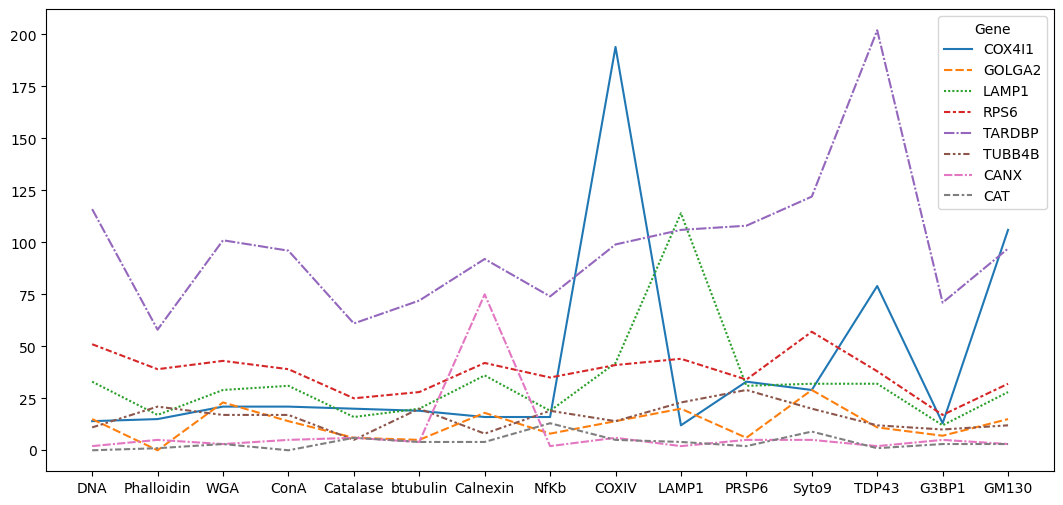

In [55]:
selected_targets_list = ['TARDBP','COX4I1','CANX','LAMP1','RPS6','TUBB4B','GOLGA2','CAT']
selected_targets_df = all_hits[all_hits['Gene'].isin(selected_targets_list)].set_index('Gene').drop('Sum',axis=1)
fig, ax = plt.subplots(figsize=(13,6))
sns.lineplot(selected_targets_df.T,ax=ax)
fig.savefig(os.path.join(output_folder,'figure_panels','HeLa_SABER_targeted_channels_ditribution.png'), dpi=300,facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()